# Plant Bio-signal Data Exploration & Feature Classification
<hr>

<img style="float: right; padding-left: 20px" src="img/Plant-Cyborg-portrait.png" width="200" height="300">

## Intro

This is an exploration of the bio-signals produced by a baby rubberplant (<i>Peperomia obtusifolia</i>). The houseplant has a robotic prosthesis that moves based on the plant's bio-signals. Four surface electrodes are each attached to a leaf, the signals are amplified 100x and fed to a script that controls the prosthesis motors. 

In [1]:
from glob import glob
from os import listdir
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
from scipy import stats

# Enable interactive matplotlib plots
%matplotlib notebook

## Data Acquisition

<img style="float: right; padding-left: 20px" src="img/Biosignal-recording-setup.png" width="225" height="300">

The baby rubberplant has surface electrodes on four of its leaves which are connected to the prosthesis computer by insulated coaxial cables.

Sensor data is collected as comma separated files (.csv) in the folder /datasets grouped by stimuli and electrode channel (i.e. the leaf that is stimulated). Each dataset are approximately 10 minutes recording of 4 single-ended channels at 140 Hz in 16-bit resolution. Each channel is amplified 100x by LM358 op-amps and read by ADS1115 16-bit analog-to-digital converter.

Under is the code used for data gathering. The whole script, ads1115-to-csv.py, is in the current folder.

```python
f = open("log.csv", "w", newline="")
c = csv.writer(f)

c.writerow(["Datetime", "chan0", "chan1", "chan2", "chan3"]) # List of fieldnames
for i in range(SAMPLES):
	c.writerow([datetime.now().isoformat(sep=' ', timespec='milliseconds'), 
                "{:8.6f}".format(chan0.voltage),
                "{:8.6f}".format(chan1.voltage), 
                "{:8.6f}".format(chan2.voltage), 
                "{:8.6f}".format(chan3.voltage)])

f.close()
```


The biosignals are grouped in the following folders: 

/datasets/baseline<br>
No light source, approximately 1 week since watering.

../chan_0_light, chan_1_light, chan_2_light, chan_3_light<br>
The denoted channel has a lightbulb with artificial sunlight approx. 10 centimeter from the leaf, while the three other channels are covered with a dark blanket.

../drought<br>
Approx. 10 minutes recording with dry soil (1 month since watering) plus soaked soil.

../chan_0_pain, chan_1_pain, chan_2_pain, chan_3_pain<br>
The leaf corresponding to the channel has been cut after approx. 10 minutes baseline recording. The cut is 5 millimeter long from the outside of the leaf blade in proximity to the surface sensor.

<img style="float: right; padding-left: 20px" src="img/Pain-stimulation.png" width="200" height="300">

In [2]:
# Import datasets and set 'Datetime' column as dataset index
datasets = glob('datasets/*.csv')
dfs = {}

for filename in datasets:
    df = pd.read_csv(filename)
    df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S.%f')
    df = df.set_index('Datetime')
    dfs[str(filename)[9:-4]] = df

## Data Analysis

In [3]:
dfs['baseline'].describe()

,chan0,chan1,chan2,chan3
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,1.599891,1.742485,1.670655,1.678602
std,0.001305,0.002980,0.002638,0.000485
min,1.593049,1.734053,1.662426,1.671801
25%,1.598799,1.739803,1.668551,1.678301
50%,1.599924,1.742553,1.670676,1.678551
75%,1.600924,1.745178,1.672676,1.678926
max,1.605549,1.749303,1.679176,1.682801


### Previews of the different sensor data:

<IPython.core.display.Javascript object>


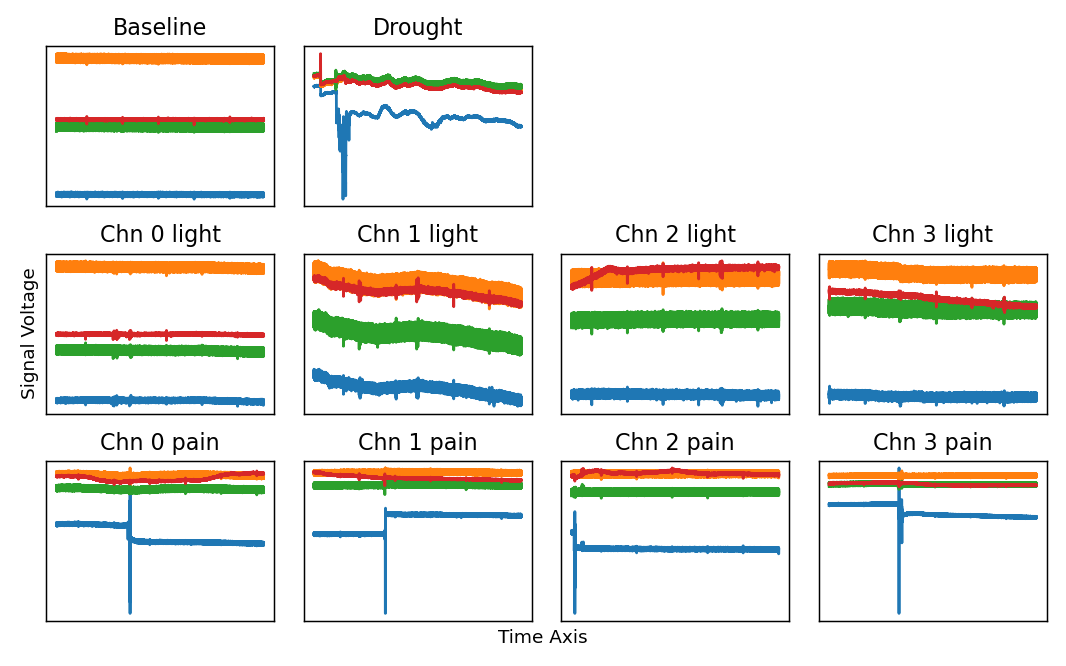

In [4]:
alpha_val = 0.7 # Signal smoothing by exponential moving averages. Small weighting factor results in high degree of smoothing, larger value provides quicker response to recent changes.
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(8,5))
dfs['baseline'].ewm(alpha=alpha_val).mean().plot(ax=axes[0,0], legend=None, xlabel=None).tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
axes[0,0].set_title("Baseline")
axes[0,0].set_xlabel('')
dfs['drought'].ewm(alpha=alpha_val).mean().plot(ax=axes[0,1], legend=None).tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
axes[0,1].set_title("Drought")
axes[0,1].set_xlabel('')
axes[0,2].set_visible(False)
axes[0,3].set_visible(False)
dfs['chan_0_light'].ewm(alpha=alpha_val).mean().plot(ax=axes[1,0], legend=None).tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
axes[1,0].set_title("Chn 0 light")
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Signal Voltage')
dfs['chan_1_light'].ewm(alpha=alpha_val).mean().plot(ax=axes[1,1], legend=None).tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
axes[1,1].set_title("Chn 1 light")
axes[1,1].set_xlabel('')
dfs['chan_2_light'].ewm(alpha=alpha_val).mean().plot(ax=axes[1,2], legend=None).tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
axes[1,2].set_title("Chn 2 light")
axes[1,2].set_xlabel('')
dfs['chan_3_light'].ewm(alpha=alpha_val).mean().plot(ax=axes[1,3], legend=None).tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
axes[1,3].set_title("Chn 3 light")
axes[1,3].set_xlabel('')
dfs['chan_0_pain'].ewm(alpha=alpha_val).mean().plot(ax=axes[2,0], legend=None).tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
axes[2,0].set_title("Chn 0 pain")
axes[2,0].set_xlabel('')
dfs['chan_1_pain'].ewm(alpha=alpha_val).mean().plot(ax=axes[2,1], legend=None).tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
axes[2,1].set_title("Chn 1 pain")
axes[2,1].set_xlabel('Time Axis')
axes[2,1].xaxis.set_label_coords(1.05, -0.05)
dfs['chan_2_pain'].ewm(alpha=alpha_val).mean().plot(ax=axes[2,2], legend=None).tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
axes[2,2].set_title("Chn 2 pain")
axes[2,2].set_xlabel('')
dfs['chan_3_pain'].ewm(alpha=alpha_val).mean().plot(ax=axes[2,3], legend=None).tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
axes[2,3].set_title("Chn 3 pain")
axes[2,3].set_xlabel('')
plt.tight_layout()
plt.show()

In [5]:
# Settings
dataset_path = 'datasets'  # Directory where raw data is stored
normal_op_list = ['baseline']
anomaly_op_list = ['chan_0_light', 'chan_1_light', 'chan_2_light', 'chan_3_light', 
                   'chan_0_pain', 'chan_1_pain', 'chan_2_pain', 'chan_3_pain', 
                   'chan_0-3_drought', 'chan_0-3_watering']
sample_rate = 140       # Hz
sample_time = 600       # Time (sec) length of each sample
samples_per_file = 84000 # Expected number of measurements in each file
max_measurements = int(sample_time * sample_rate)

print('Max measurements per file:', max_measurements)

Max measurements per file: 84000


In [6]:
# Create list of filenames
def createFilenameList(op_list):
    
    # Extract paths and filenames in each directory
    op_filenames = []
    num_samples = 0
    for index, target in enumerate(op_list):
        samples_in_dir = listdir(join(dataset_path, target))
        samples_in_dir = [join(dataset_path, target, sample) for sample in samples_in_dir]
        op_filenames.append(samples_in_dir)
    
    # Flatten list
    return [item for sublist in op_filenames for item in sublist]

In [7]:
# Create normal and anomaly filename lists
normal_op_filenames = createFilenameList(normal_op_list)
anomaly_op_filenames = createFilenameList(anomaly_op_list)
print('Number of normal samples:', len(normal_op_filenames))
print('Number of anomaly samples:', len(anomaly_op_filenames))

Number of normal samples: 26
Number of anomaly samples: 40


In [8]:
# Function to plot normal vs anomaly samples side-by-side
def plotTimeSeriesSample(normal_sample, anomaly_sample):
    fig, axs = plt.subplots(2, 1, figsize=(6, 6))
    fig.tight_layout(pad=3.0)
    axs[0].plot(normal_sample.T[0], label='Channel 0', alpha=0.9)
    axs[0].plot(normal_sample.T[1], label='Channel 1', alpha=0.7)
    axs[0].plot(normal_sample.T[2], label='Channel 2', alpha=0.5)
    axs[0].plot(normal_sample.T[3], label='Channel 3', alpha=0.3)
    axs[0].set_title('Normal sample')
    axs[0].set_xlabel('time (samples)')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()
    axs[1].plot(anomaly_sample.T[0], label='Channel 0', alpha=0.9)
    axs[1].plot(anomaly_sample.T[1], label='Channel 1', alpha=0.7)
    axs[1].plot(anomaly_sample.T[2], label='Channel 2', alpha=0.5)
    axs[1].plot(anomaly_sample.T[3], label='Channel 3', alpha=0.3)
    axs[1].set_title('Anomaly sample')
    axs[1].set_xlabel('time (samples)')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend()

In [9]:
# Function to plot 3D scatterplot of normal and anomaly samples
def plotScatterSamples(normal_samples, anomaly_samples, num_samples, title=''):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(num_samples):
        ax.scatter(anomaly_samples[i].T[1], anomaly_samples[i].T[2], anomaly_samples[i].T[3], c='r')
        ax.scatter(normal_samples[i].T[1], normal_samples[i].T[2], normal_samples[i].T[3], c='b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)
    anomalies = mpatches.Patch(color='red', label='Anomalies')
    baselines = mpatches.Patch(color='blue', label='Baseline samples')
    ax.legend(handles=[anomalies, baselines])

<IPython.core.display.Javascript object>


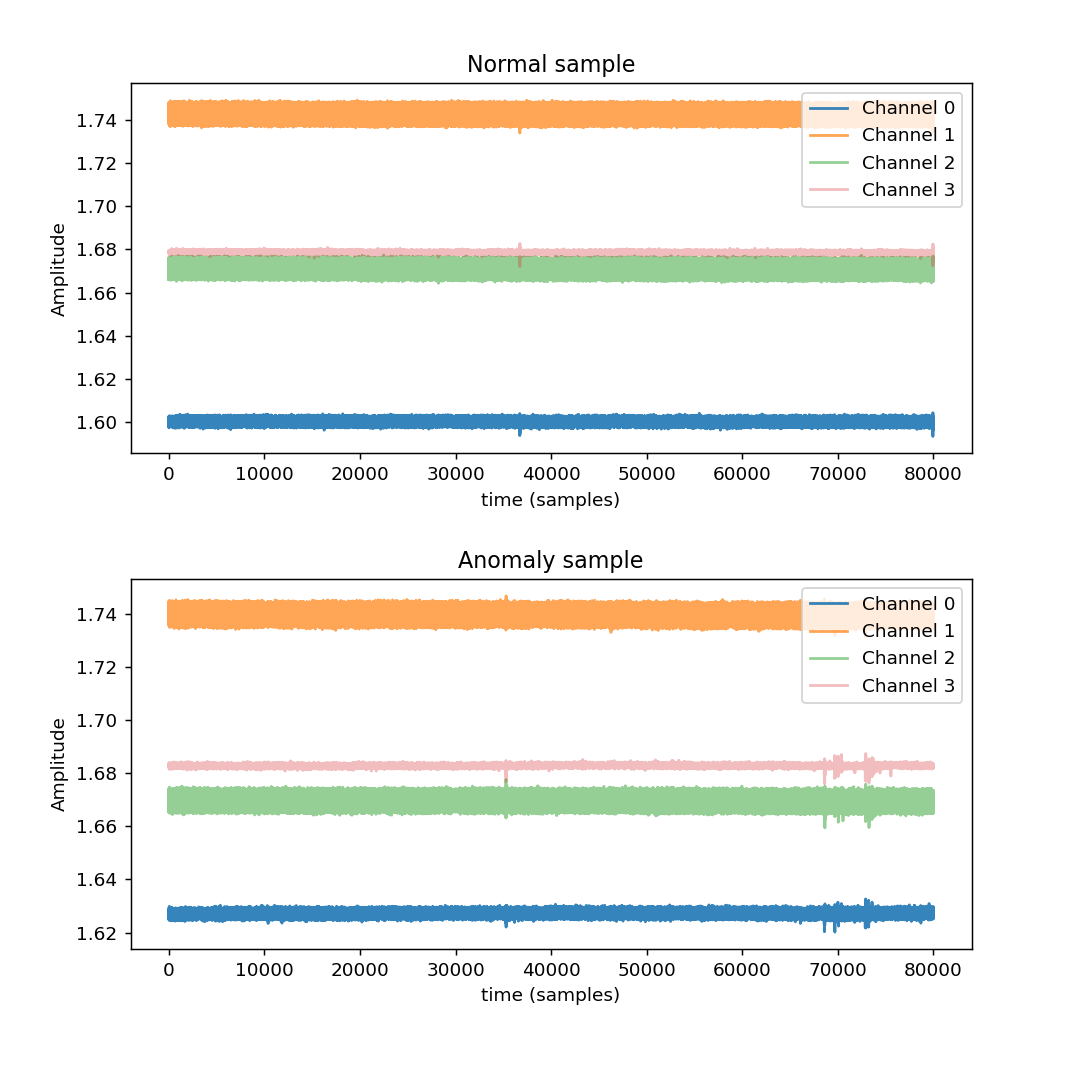

datasets\chan_0_light\0000.csv
datasets\baseline\0000.csv


In [10]:
# Examine a normal sample vs anomalous sample

# Import samples as numpy arrays
normal_sample = np.genfromtxt(normal_op_filenames[0], skip_header=1, usecols=(1,2,3,4), max_rows=80000, dtype=float, delimiter=',')
anomaly_sample = np.genfromtxt(anomaly_op_filenames[0], skip_header=1, usecols=(1,2,3,4), max_rows=80000, dtype=float, delimiter=',')

# Plot time series of biosignal data
plotTimeSeriesSample(normal_sample, anomaly_sample)
print(anomaly_op_filenames[0])
print(normal_op_filenames[0])

In [11]:
# Shuffle samples for further analysis
random.shuffle(normal_op_filenames)
random.shuffle(anomaly_op_filenames)

<IPython.core.display.Javascript object>


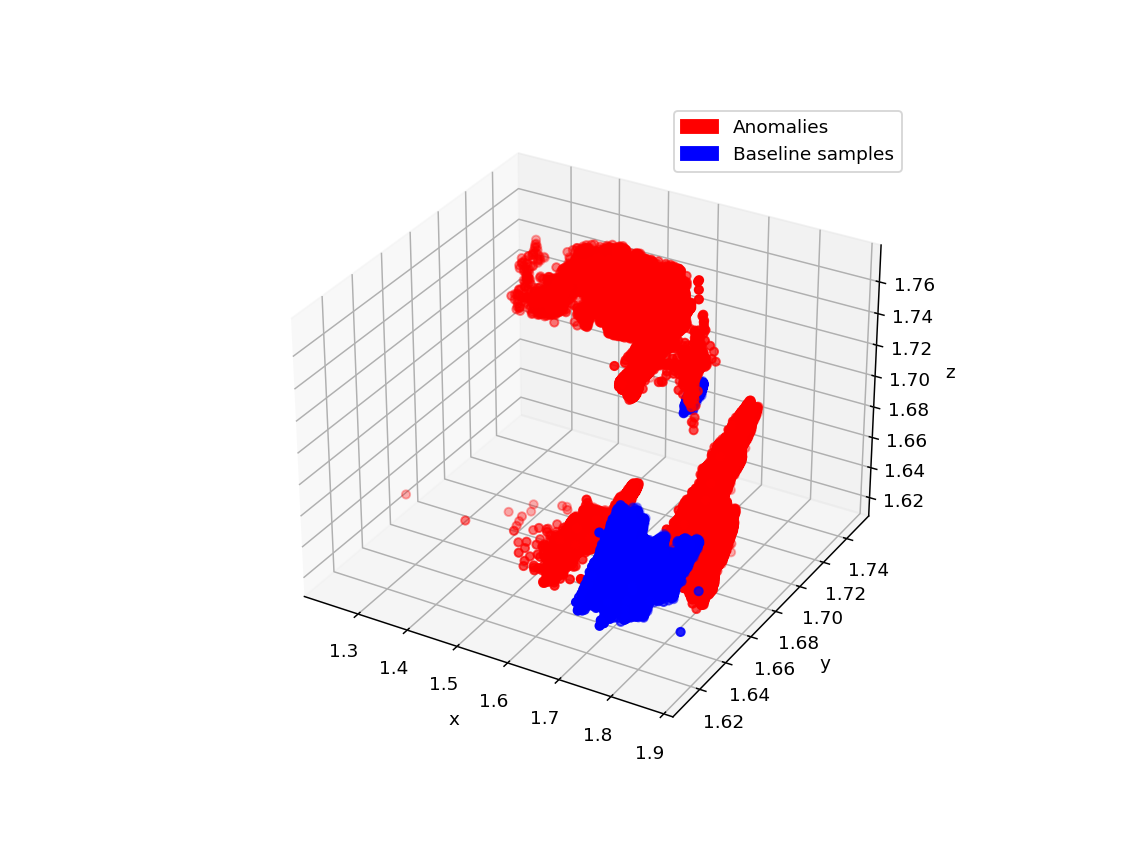

In [12]:
# Make a 3D scatterplot
num_samples = 20
normal_samples = []
anomaly_samples = []
for i in range(num_samples):
    anomaly_samples.append(np.genfromtxt(anomaly_op_filenames[i], delimiter=','))
    normal_samples.append(np.genfromtxt(normal_op_filenames[i], delimiter=','))

plotScatterSamples(normal_samples, anomaly_samples, num_samples)

<IPython.core.display.Javascript object>


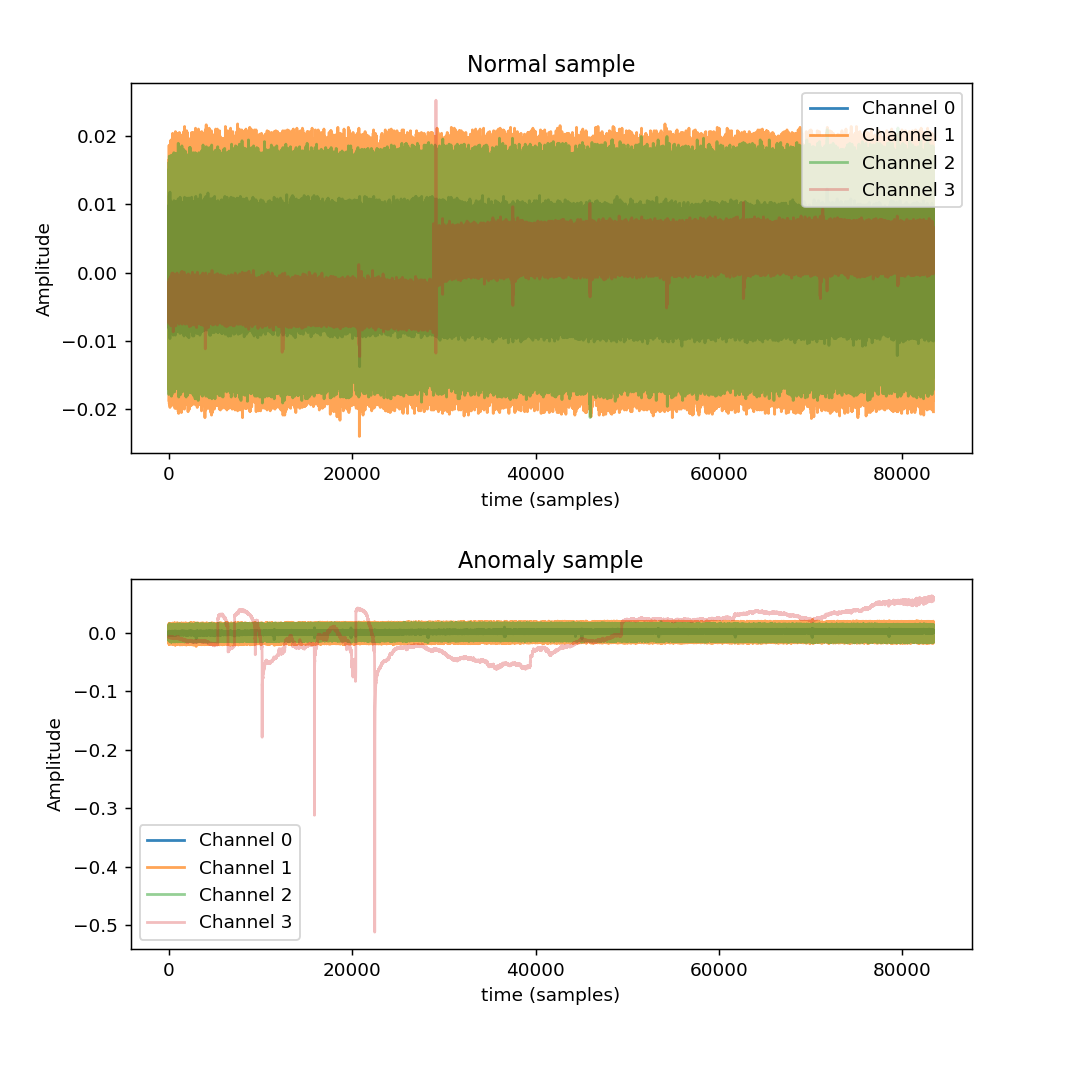

In [13]:
# Let's remove DC to see what it looks like in time domain
normal_sample = np.genfromtxt(normal_op_filenames[0], skip_header=1, usecols=(1,2,3,4), dtype=float, delimiter=',')
anomaly_sample = np.genfromtxt(anomaly_op_filenames[0], skip_header=1, usecols=(1,2,3,4), dtype=float, delimiter=',')
normal_sample = normal_sample - np.mean(normal_sample, axis=0)
anomaly_sample = anomaly_sample - np.mean(anomaly_sample, axis=0)

# Plot time series of biosignal data
plotTimeSeriesSample(normal_sample, anomaly_sample)

(83401, 5)


<IPython.core.display.Javascript object>


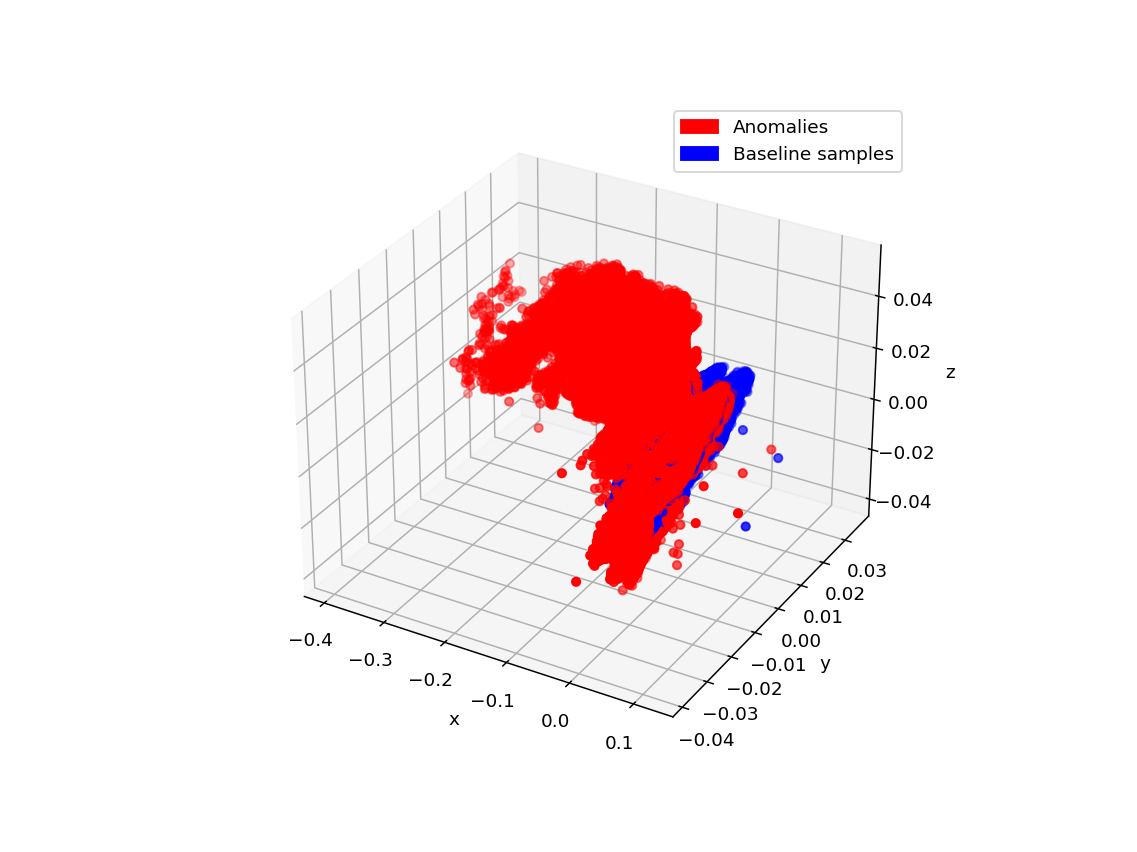

In [14]:
# Make a 3D scatterplot with DC removed
num_samples = 10
normal_samples = []
anomaly_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], delimiter=',')
    anomaly_sample = np.genfromtxt(anomaly_op_filenames[i], delimiter=',')
    normal_sample = normal_sample - np.mean(normal_sample[1:4], axis=0)
    anomaly_sample = anomaly_sample - np.mean(anomaly_sample[1:4], axis=0)
    normal_samples.append(normal_sample)
    anomaly_samples.append(anomaly_sample)

print(anomaly_samples[0].shape)
plotScatterSamples(normal_samples, anomaly_samples, num_samples)

In [15]:
# Let's look at various statistics of 1 sample (with DC removed)
idx = 0
normal_sample = np.genfromtxt(normal_op_filenames[idx], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
normal_sample = normal_sample - np.mean(normal_sample, axis=0)

print('Sample shape:', normal_sample.shape)
print('Mean:', np.mean(normal_sample, axis=0))
print('Variance:', np.var(normal_sample, axis=0))
print('Kurtosis:', stats.kurtosis(normal_sample))
print('Skew:', stats.skew(normal_sample))
print('MAD:', stats.median_abs_deviation(normal_sample))
print('Correlation:')
print(np.corrcoef(normal_sample.T))

Sample shape: (83400, 4)
Mean: [-2.28929266e-14  6.08729161e-15  5.59495642e-14  1.00867377e-13]
Variance: [2.10106449e-05 7.91252051e-05 6.25977921e-05 1.75960198e-05]
Kurtosis: [-0.46787909 -0.57743458 -0.48834608 -1.10549269]
Skew: [ 0.15527934  0.03546499  0.05169862 -0.37301016]
MAD: [0.00275  0.006625 0.005626 0.002625]
Correlation:
[[ 1.          0.41091538 -0.02294094 -0.10706456]
 [ 0.41091538  1.          0.63411247  0.16030402]
 [-0.02294094  0.63411247  1.          0.32361336]
 [-0.10706456  0.16030402  0.32361336  1.        ]]


<IPython.core.display.Javascript object>


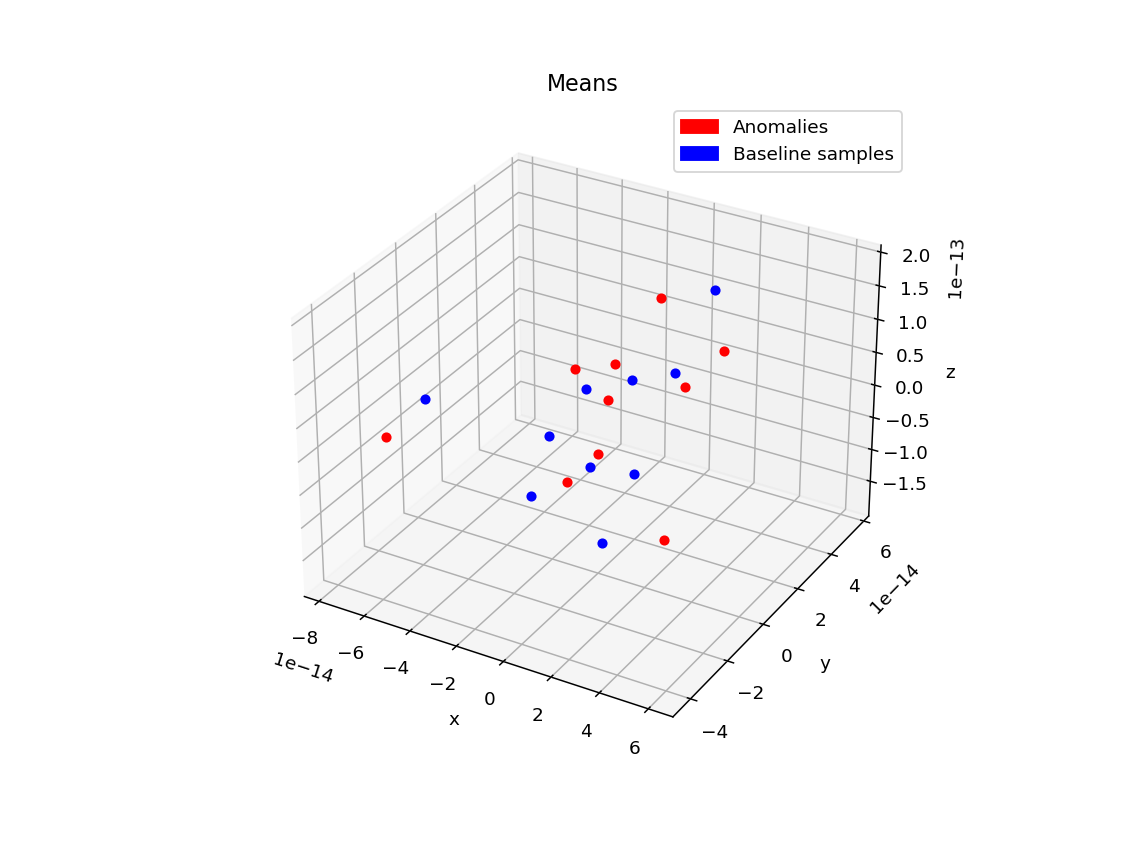

In [16]:
# Make a 3D scatterplot of means (with DC removed)
num_samples = 10
normal_samples = []
anomaly_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    anomaly_sample = np.genfromtxt(anomaly_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    normal_sample = normal_sample - np.mean(normal_sample, axis=0)
    anomaly_sample = anomaly_sample - np.mean(anomaly_sample, axis=0)
    normal_samples.append(np.mean(normal_sample, axis=0))
    anomaly_samples.append(np.mean(anomaly_sample, axis=0))
plotScatterSamples(normal_samples, anomaly_samples, num_samples, title='Means')

<IPython.core.display.Javascript object>


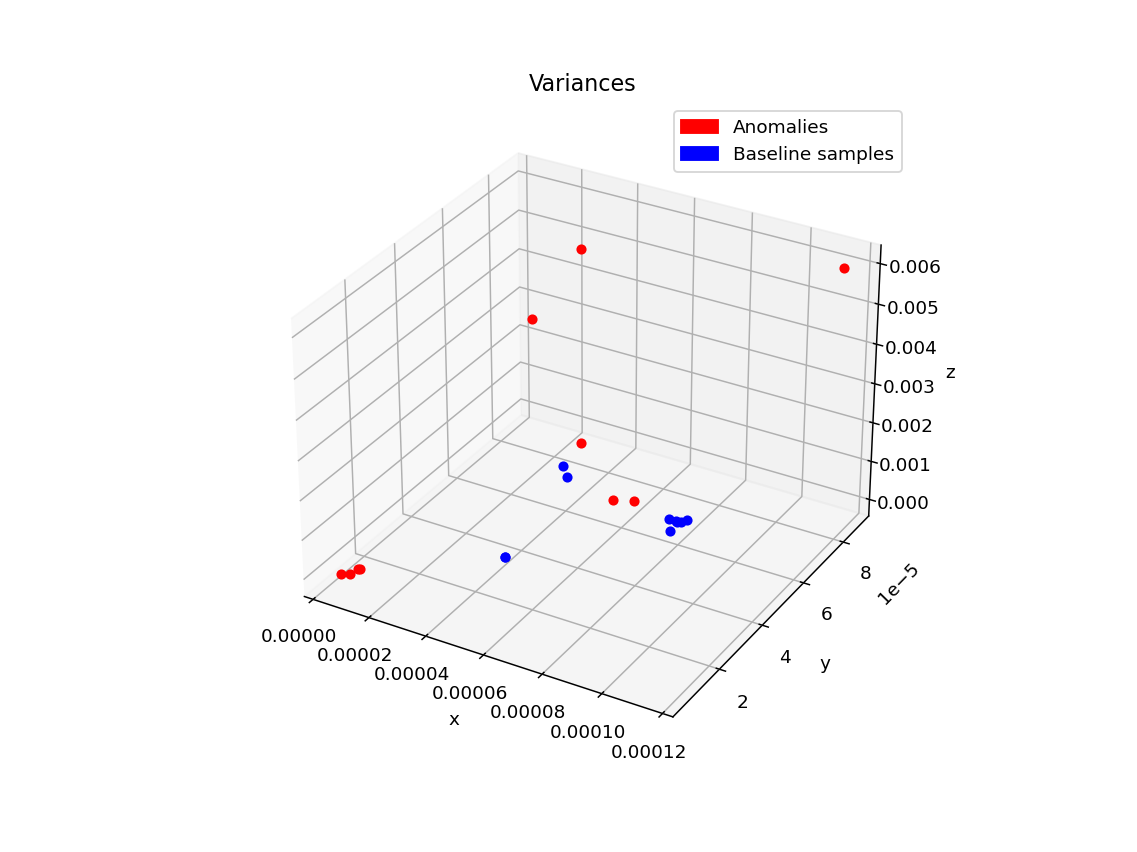

In [17]:
# Make a 3D scatterplot of variances
num_samples = 10
normal_samples = []
anomaly_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    anomaly_sample = np.genfromtxt(anomaly_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    normal_samples.append(np.var(normal_sample, axis=0))
    anomaly_samples.append(np.var(anomaly_sample, axis=0))
plotScatterSamples(normal_samples, anomaly_samples, num_samples, title='Variances')

<IPython.core.display.Javascript object>


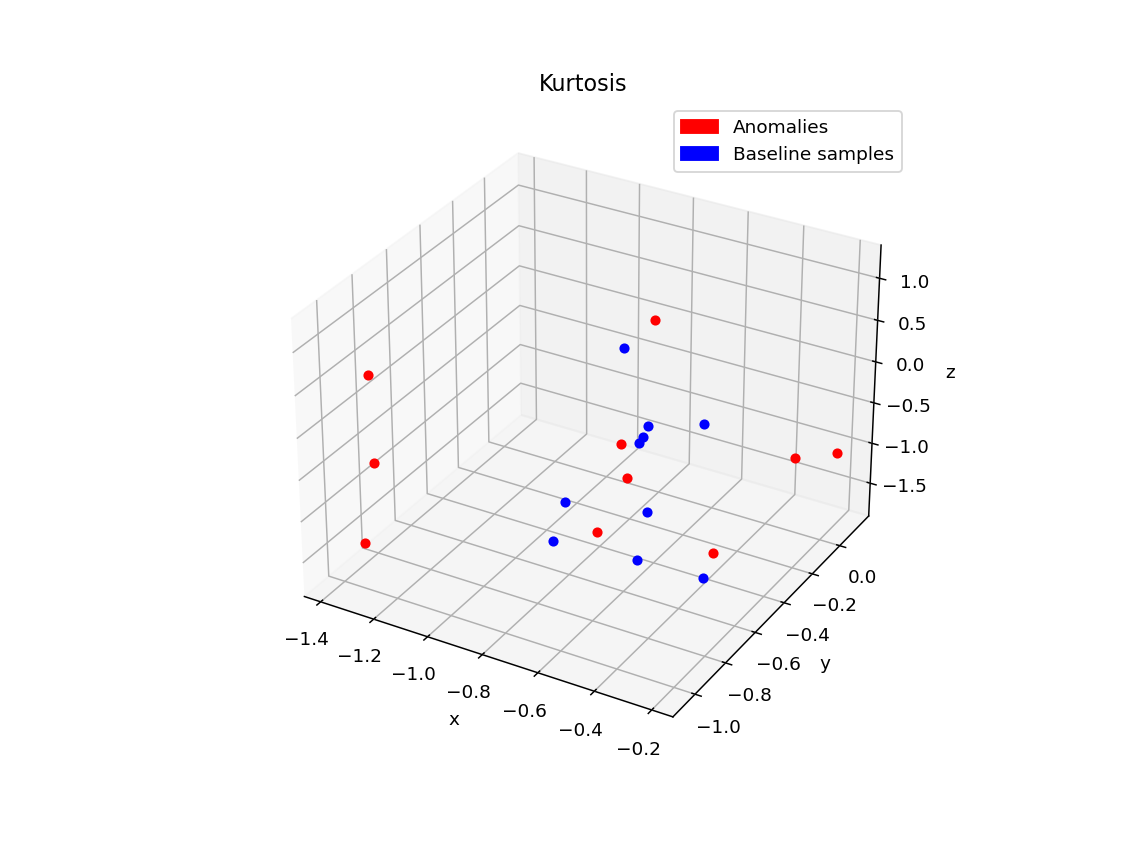

In [18]:
# Make a 3D scatterplot of kurtosis
num_samples = 10
normal_samples = []
anomaly_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    anomaly_sample = np.genfromtxt(anomaly_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    normal_samples.append(stats.kurtosis(normal_sample))
    anomaly_samples.append(stats.kurtosis(anomaly_sample))
plotScatterSamples(normal_samples, anomaly_samples, num_samples, title='Kurtosis')

<IPython.core.display.Javascript object>


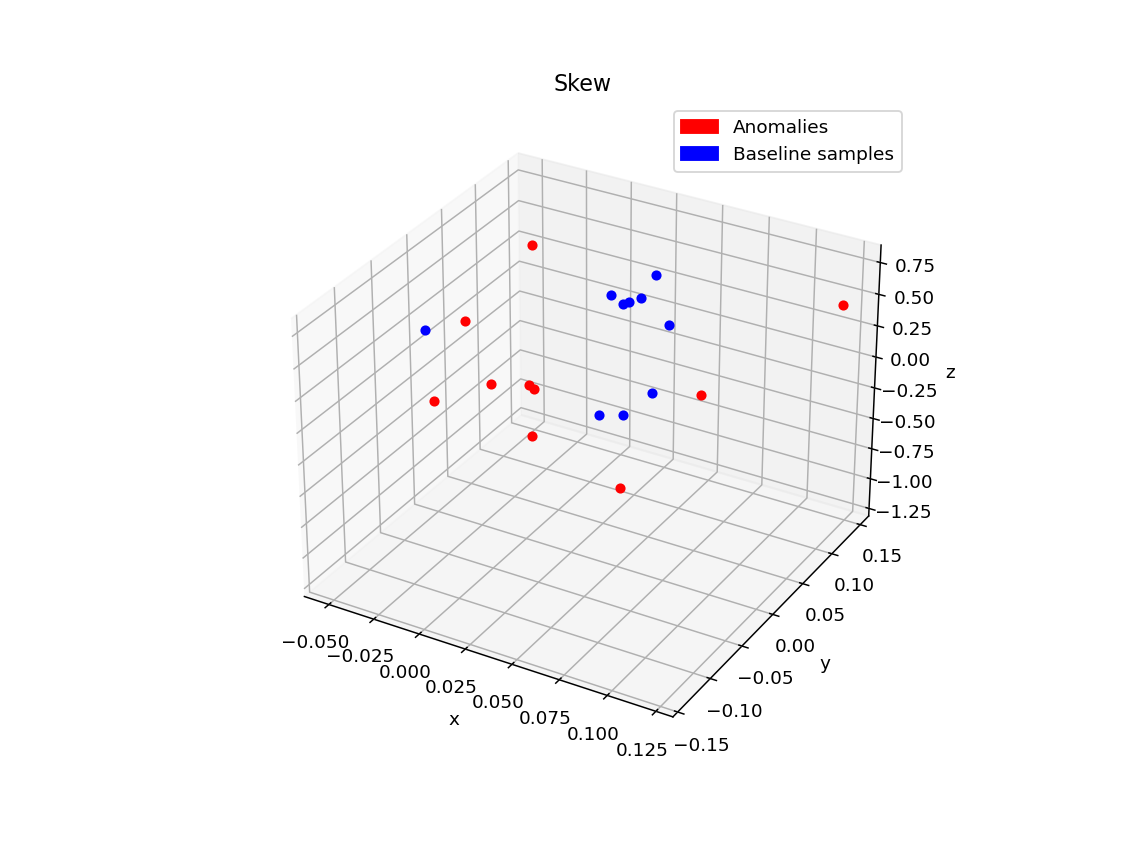

In [19]:
# Make a 3D scatterplot of skew
num_samples = 10
normal_samples = []
anomaly_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    anomaly_sample = np.genfromtxt(anomaly_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    normal_samples.append(stats.skew(normal_sample))
    anomaly_samples.append(stats.skew(anomaly_sample))
plotScatterSamples(normal_samples, anomaly_samples, num_samples, title='Skew')

<IPython.core.display.Javascript object>


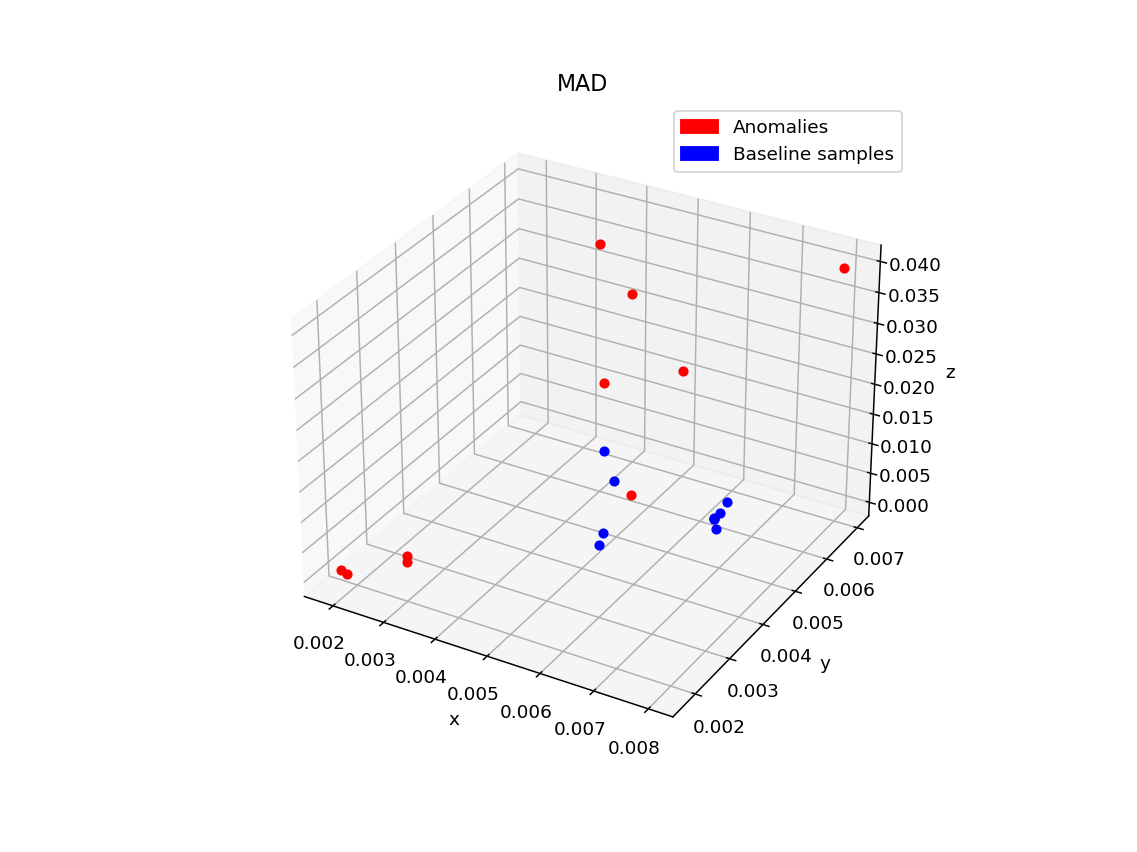

In [20]:
# Make a 3D scatterplot of MAD
num_samples = 10
normal_samples = []
anomaly_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    anomaly_sample = np.genfromtxt(anomaly_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    normal_samples.append(stats.median_abs_deviation(normal_sample))
    anomaly_samples.append(stats.median_abs_deviation(anomaly_sample))
plotScatterSamples(normal_samples, anomaly_samples, num_samples, title='MAD')

Correlation coefficients of normal sample:
[[ 1.          0.37765458 -0.02765321 -0.13906232]
 [ 0.37765458  1.          0.64574918  0.3707258 ]
 [-0.02765321  0.64574918  1.          0.6840203 ]
 [-0.13906232  0.3707258   0.6840203   1.        ]]


<IPython.core.display.Javascript object>


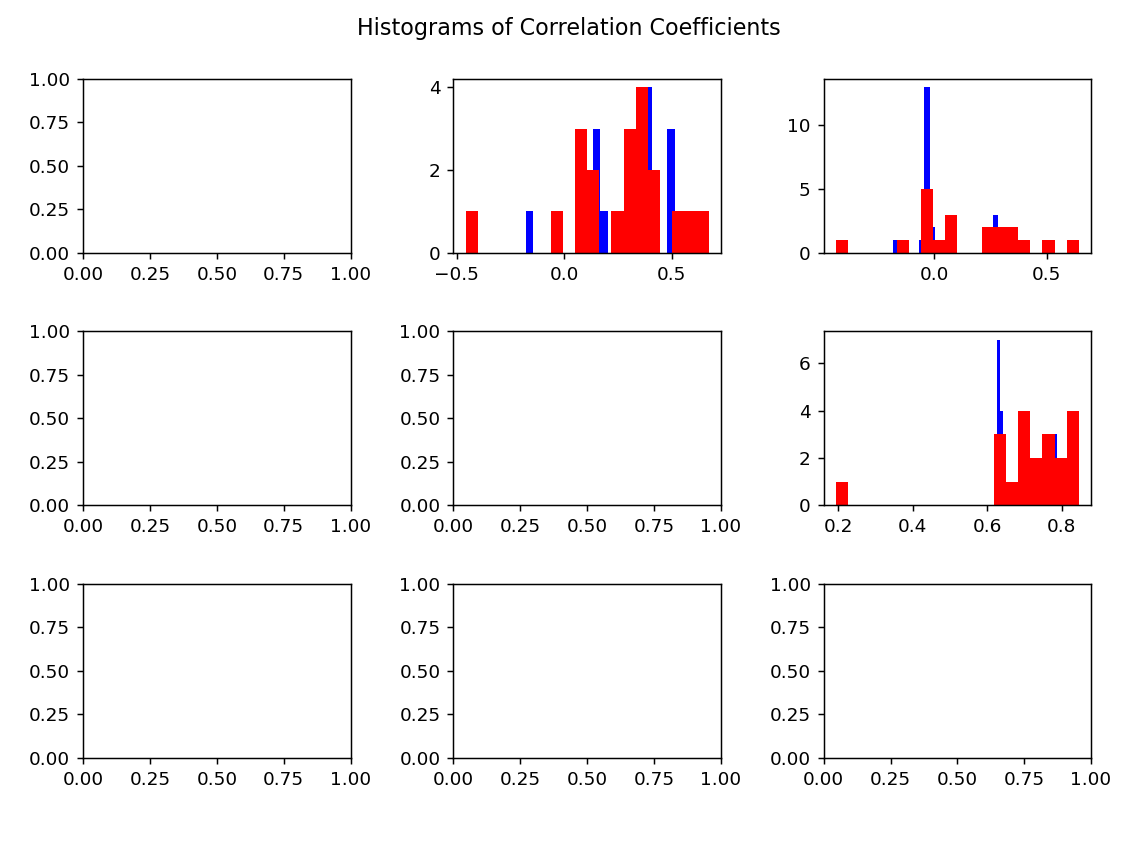

Text(0.5, 0.98, 'Histograms of Correlation Coefficients')

In [21]:
# Plot histograms of correlation matricies
num_samples = 20
n_bins = 20
normal_samples = []
anomaly_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    anomaly_sample = np.genfromtxt(anomaly_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), delimiter=',')
    normal_sample = normal_sample - np.mean(normal_sample, axis=0)
    anomaly_sample = anomaly_sample - np.mean(anomaly_sample, axis=0)
    normal_samples.append(np.corrcoef(normal_sample.T))
    anomaly_samples.append(np.corrcoef(anomaly_sample.T))
normal_samples = np.array(normal_samples)
anomaly_samples = np.array(anomaly_samples)
print('Correlation coefficients of normal sample:')
print(np.corrcoef(normal_sample.T))

# Draw plots
fig, axs = plt.subplots(3, 3)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
axs[0, 1].hist(normal_samples[:,0,1], bins=n_bins, color='blue')
axs[0, 1].hist(anomaly_samples[:,0,1], bins=n_bins, color='red')
axs[0, 2].hist(normal_samples[:,0,2], bins=n_bins, color='blue')
axs[0, 2].hist(anomaly_samples[:,0,2], bins=n_bins, color='red')
axs[1, 2].hist(normal_samples[:,1,2], bins=n_bins, color='blue')
axs[1, 2].hist(anomaly_samples[:,1,2], bins=n_bins, color='red')
fig.suptitle('Histograms of Correlation Coefficients')

In [22]:
# Function: Calculate FFT for each axis in a given sample
def extract_fft_features(sample):

    # Truncate sample size
    sample = sample[0:80000]

    # Crate a window
    hann_window = np.hanning(sample.shape[0])

    # Compute a windowed FFT of each axis in the sample (leave off DC)
    out_sample = np.zeros((int(sample.shape[0] / 2), sample.shape[1]))
    for i, axis in enumerate(sample.T):
        fft = abs(np.fft.rfft(axis * hann_window))
        out_sample[:, i] = fft[1:]

    return out_sample

In [24]:
# Test: Compute FFTs (without DC) for samples and average them together
num_samples = 20
normal_ffts = []
anomaly_ffts = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), dtype=float, delimiter=',', max_rows=34000)
    anomaly_sample = np.genfromtxt(anomaly_op_filenames[i], skip_header=1, usecols = (1, 2, 3, 4), dtype=float, delimiter=',', max_rows=34000)
    normal_fft = extract_fft_features(normal_sample)
    anomaly_fft = extract_fft_features(anomaly_sample)
    normal_ffts.append(normal_fft)
    anomaly_ffts.append(anomaly_fft)
normal_ffts = np.array(normal_ffts)
anomaly_ffts = np.array(anomaly_ffts)
normal_fft_avg = np.average(normal_ffts, axis=0)
anomaly_fft_avg = np.average(anomaly_ffts, axis=0)

<IPython.core.display.Javascript object>


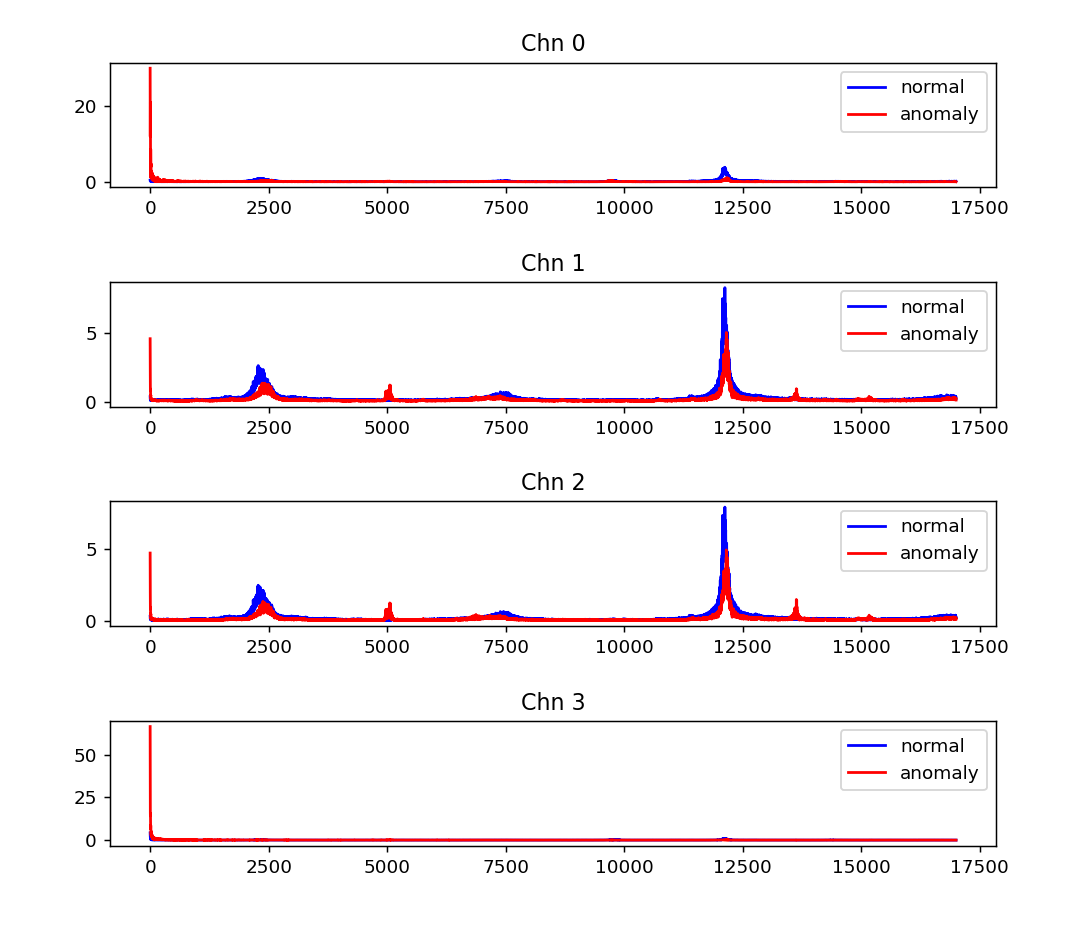

In [25]:
# Plot FFTs
start_bin = 1
fig, axs = plt.subplots(4, 1, figsize=(8, 7))
fig.tight_layout(pad=3.0)

axs[0].plot(normal_fft_avg[start_bin:, 0], label='normal', color='blue')
axs[0].plot(anomaly_fft_avg[start_bin:, 0], label='anomaly', color='red')
axs[0].set_title('Chn 0')
axs[0].legend()

axs[1].plot(normal_fft_avg[start_bin:, 1], label='normal', color='blue')
axs[1].plot(anomaly_fft_avg[start_bin:, 1], label='anomaly', color='red')
axs[1].set_title('Chn 1')
axs[1].legend()

axs[2].plot(normal_fft_avg[start_bin:, 2], label='normal', color='blue')
axs[2].plot(anomaly_fft_avg[start_bin:, 2], label='anomaly', color='red')
axs[2].set_title('Chn 2')
axs[2].legend()

axs[3].plot(normal_fft_avg[start_bin:, 3], label='normal', color='blue')
axs[3].plot(anomaly_fft_avg[start_bin:, 3], label='anomaly', color='red')
axs[3].set_title('Chn 3')
axs[3].legend()